In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Anemia Type Dataset New - anemia (1).csv')

In [ ]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result,Empty,Type
0,1,14.9,22.7,29.1,83.7,0,NaN,Not Anemic
1,0,15.9,25.4,28.3,72.0,0,NaN,Not Anemic
2,0,9.0,21.5,29.6,71.2,1,NaN,Microcytic
3,0,14.9,16.0,31.4,87.5,0,NaN,Not Anemic
4,1,14.7,22.0,28.2,99.5,0,NaN,Not Anemic


In [ ]:
df.drop(['MCH','Empty','Result'],inplace=True,axis=1)

In [ ]:
df.head()

,Gender,Hemoglobin,MCHC,MCV,Type
0,1,14.9,29.1,83.7,Not Anemic
1,0,15.9,28.3,72.0,Not Anemic
2,0,9.0,29.6,71.2,Microcytic
3,0,14.9,31.4,87.5,Not Anemic
4,1,14.7,28.2,99.5,Not Anemic


In [ ]:
df.shape

(534, 5)

In [ ]:
df['Gender'].replace(1,'Male',inplace = True)
df['Gender'].replace(0,'Female',inplace=True)
df.head(10)

,Gender,Hemoglobin,MCHC,MCV,Type
0,Male,14.9,29.1,83.7,Not Anemic
1,Female,15.9,28.3,72.0,Not Anemic
2,Female,9.0,29.6,71.2,Microcytic
3,Female,14.9,31.4,87.5,Not Anemic
4,Male,14.7,28.2,99.5,Not Anemic
5,Female,11.6,30.9,74.5,Not Anemic
6,Male,12.7,28.9,82.9,Chronic Disease Anemia
7,Male,12.7,28.2,92.3,Chronic Disease Anemia
8,Female,14.1,30.5,75.2,Not Anemic
9,Male,14.9,31.3,82.9,Not Anemic


In [ ]:
df['Gender'].replace('Male',1,inplace = True)
df['Gender'].replace('Female',0,inplace=True)
df.head(10)

,Gender,Hemoglobin,MCHC,MCV,Type
0,1,14.9,29.1,83.7,Not Anemic
1,0,15.9,28.3,72.0,Not Anemic
2,0,9.0,29.6,71.2,Microcytic
3,0,14.9,31.4,87.5,Not Anemic
4,1,14.7,28.2,99.5,Not Anemic
5,0,11.6,30.9,74.5,Not Anemic
6,1,12.7,28.9,82.9,Chronic Disease Anemia
7,1,12.7,28.2,92.3,Chronic Disease Anemia
8,0,14.1,30.5,75.2,Not Anemic
9,1,14.9,31.3,82.9,Not Anemic


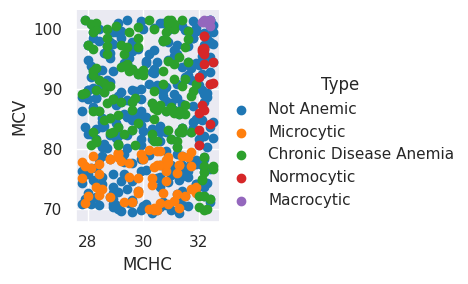

In [ ]:
sns.FacetGrid(df, hue="Type", palette='tab10') \
   .map(plt.scatter, "MCHC", "MCV") \
   .add_legend()

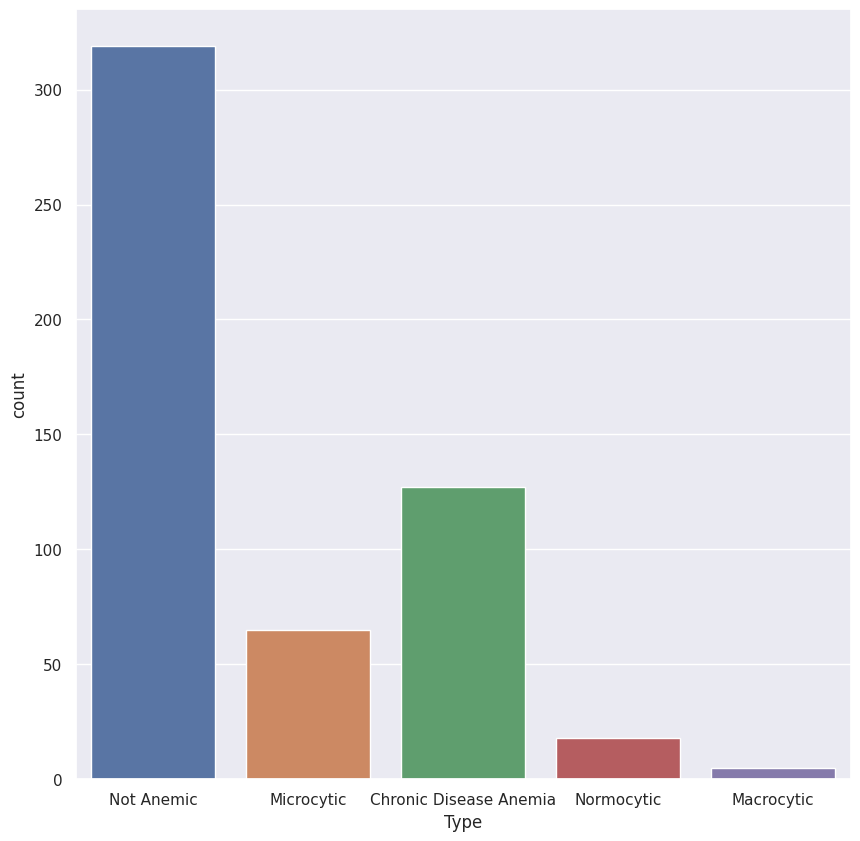

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type',data=df)
plt.show()

In [ ]:
df['Type'].value_counts()

Not Anemic                319
Chronic Disease Anemia    127
Microcytic                 65
Normocytic                 18
Macrocytic                  5
Name: Type, dtype: int64

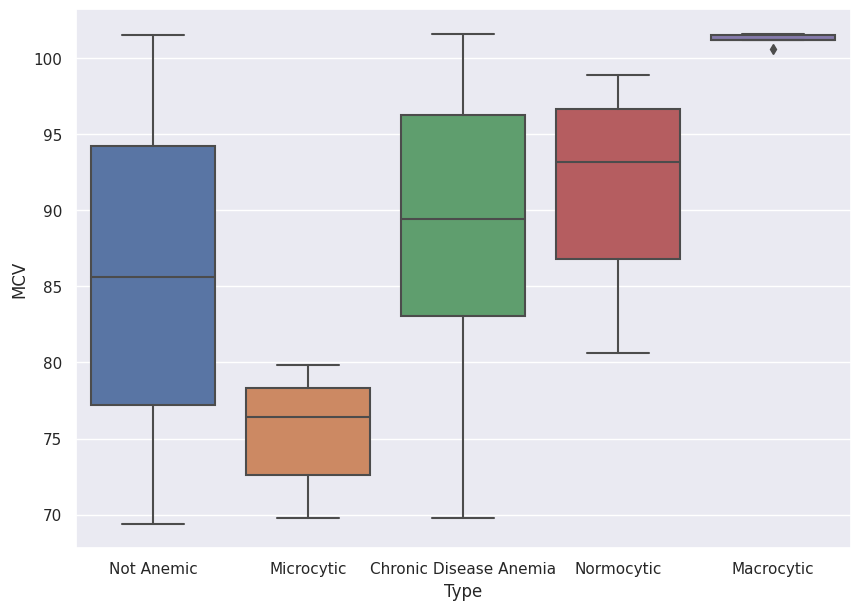

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
plt.figure(figsize=(10,7))
sns.boxplot(x="Type", y="MCV", data=df)
plt.show()

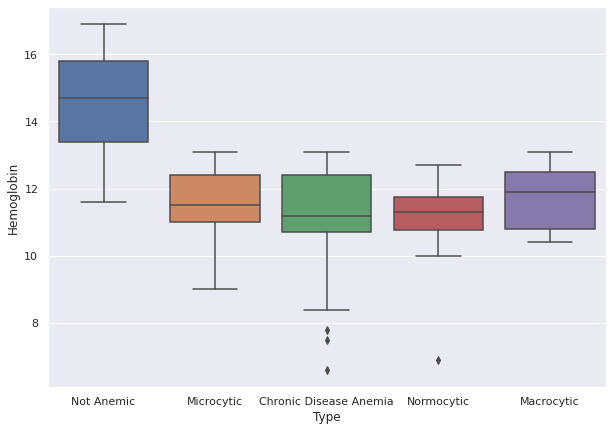

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Type", y="Hemoglobin", data=df)
plt.show()

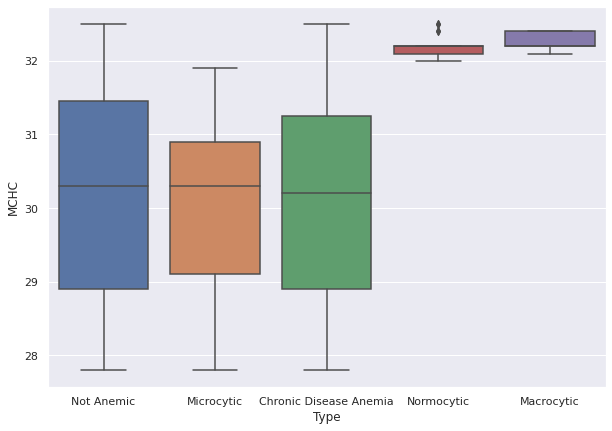

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Type", y="MCHC", data=df)
plt.show()

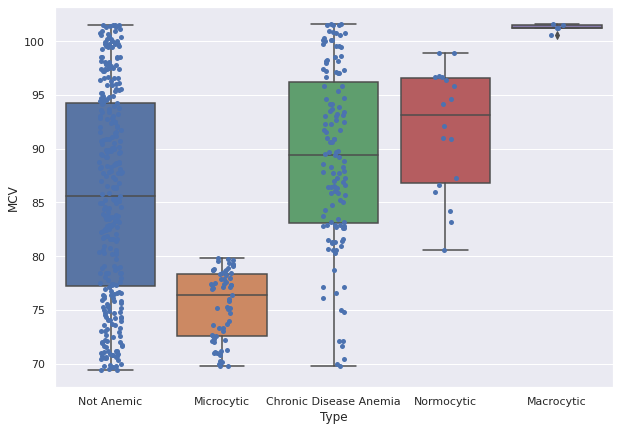

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Type", y="MCV", data=df)
ax = sns.stripplot(x="Type", y="MCV", data=df, jitter=True, edgecolor="gray")
plt.show()

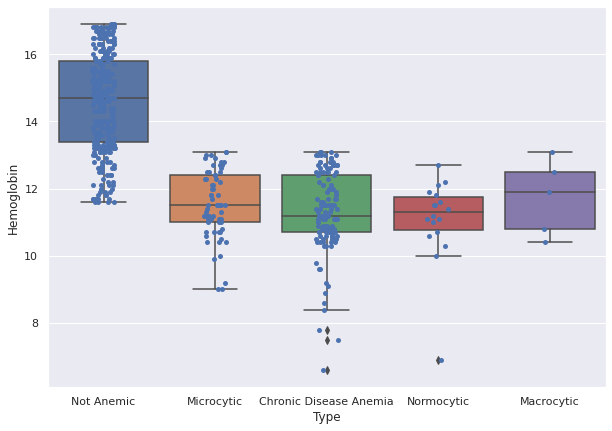

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Type", y="Hemoglobin", data=df)
ax = sns.stripplot(x="Type", y="Hemoglobin", data=df, jitter=True, edgecolor="gray")
plt.show()

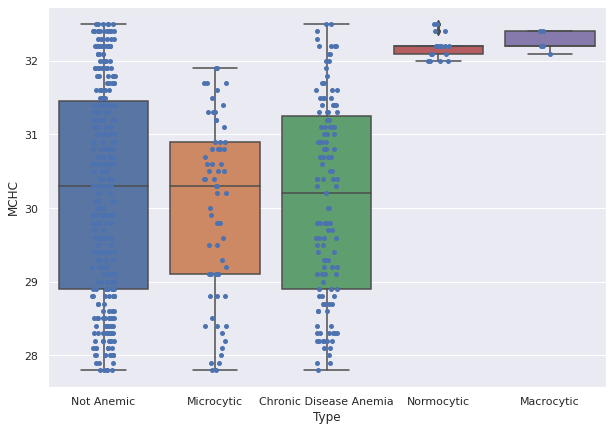

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Type", y="MCHC", data=df)
ax = sns.stripplot(x="Type", y="MCHC", data=df, jitter=True, edgecolor="gray")
plt.show()

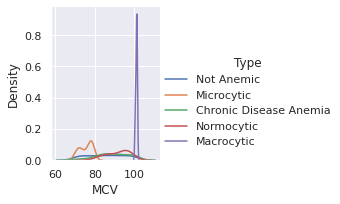

In [ ]:
sns.FacetGrid(df, hue="Type") \
   .map(sns.kdeplot, "MCV") \
   .add_legend()

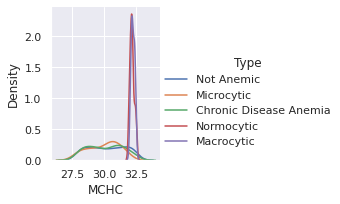

In [ ]:
sns.FacetGrid(df, hue="Type") \
   .map(sns.kdeplot, "MCHC") \
   .add_legend()

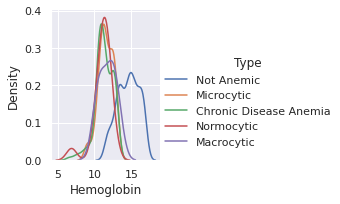

In [ ]:
sns.FacetGrid(df, hue="Type") \
   .map(sns.kdeplot, "Hemoglobin") \
   .add_legend()

<Axes: >

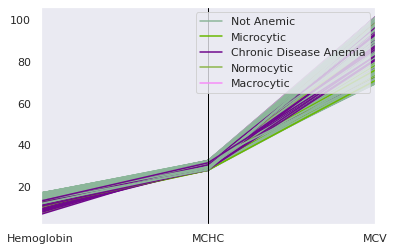

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop(['Gender'],axis=1), "Type")

Machine Learning Part - 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()


classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                        precision    recall  f1-score   support

Chronic Disease Anemia       1.00      1.00      1.00        37
            Macrocytic       1.00      1.00      1.00         3
            Microcytic       1.00      0.94      0.97        16
            Normocytic       1.00      0.67      0.80         3
            Not Anemic       0.97      1.00      0.99        75

              accuracy                           0.99       134
             macro avg       0.99      0.92      0.95       134
          weighted avg       0.99      0.99      0.98       134

[[37  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 15  0  1]
 [ 0  0  0  2  1]
 [ 0  0  0  0 75]]
accuracy is 0.9850746268656716


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                        precision    recall  f1-score   support

Chronic Disease Anemia       0.88      0.81      0.85        37
            Macrocytic       1.00      0.67      0.80         3
            Microcytic       0.70      0.88      0.78        16
            Normocytic       0.50      0.33      0.40         3
            Not Anemic       0.93      0.95      0.94        75

              accuracy                           0.88       134
             macro avg       0.80      0.73      0.75       134
          weighted avg       0.88      0.88      0.88       134

[[30  0  4  0  3]
 [ 0  2  0  1  0]
 [ 0  0 14  0  2]
 [ 2  0  0  1  0]
 [ 2  0  2  0 71]]
accuracy is 0.8805970149253731


In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                        precision    recall  f1-score   support

Chronic Disease Anemia       1.00      1.00      1.00        37
            Macrocytic       1.00      0.33      0.50         3
            Microcytic       1.00      1.00      1.00        16
            Normocytic       0.75      1.00      0.86         3
            Not Anemic       0.99      1.00      0.99        75

              accuracy                           0.99       134
             macro avg       0.95      0.87      0.87       134
          weighted avg       0.99      0.99      0.98       134

[[37  0  0  0  0]
 [ 0  1  0  1  1]
 [ 0  0 16  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 75]]
accuracy is 0.9850746268656716


In [ ]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy with k=4", accuracy_score(y_test, y_pred_5)*100)
print(classification_report(y_test, y_pred_5))

Accuracy with k=4 82.83582089552239
                        precision    recall  f1-score   support

Chronic Disease Anemia       0.78      0.68      0.72        37
            Macrocytic       0.00      0.00      0.00         3
            Microcytic       0.80      1.00      0.89        16
            Normocytic       0.50      0.33      0.40         3
            Not Anemic       0.86      0.92      0.89        75

              accuracy                           0.83       134
             macro avg       0.59      0.59      0.58       134
          weighted avg       0.81      0.83      0.81       134



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf.predict([[0,11.1,35.0,71.2]])

array(['Chronic Disease Anemia'], dtype=object)